### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from utils import get_X_y, get_test

%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.metrics import roc_auc_score
def get_metrics(y_pred, y_targ, y_prob):
    auc = roc_auc_score(y_targ, y_prob)
    num = get_num(y_pred, y_targ)
    asy1 = get_ASY(y_pred, y_targ, p=[-9, 9, 1, 0])
    asy2 = get_ASY(y_pred, y_targ, p=[-1, 3, 2, -1])
    return auc, num, asy1, asy2
def get_num(y_pred, y_targ):
    return np.sum(y_pred != y_targ)
def get_ASY(y_pred, y_targ, p=[-1, 1, 1, -1]):
    TP = np.sum((y_pred == 1) & (y_targ == 1))
    FP = np.sum((y_pred == 1) & (y_targ == 0))
    FN = np.sum((y_pred == 0) & (y_targ == 1))
    TN = np.sum((y_pred == 0) & (y_targ == 0))
    return p[0]*TP + p[1]*FP + p[2]*FN + p[3]*TN

### DataSet 4

In [3]:
X, y = get_X_y(4, False)
X_test = get_test(4, False)

In [4]:
X.describe()

0             1            2             3            4   \
count   1000.000000   1000.000000  1000.000000   1000.000000  1000.000000   
mean     558.159597    652.090135    94.325948    441.985035   154.652286   
std     5629.302755   6576.611200   951.318287   4457.645319  1559.738229   
min   -18101.550648 -21147.813624 -3059.048398 -14334.010746 -5015.488961   
25%    -3439.363183  -4018.152198  -581.230957  -2723.524811  -952.941294   
50%      691.050637    807.346072   116.790737    547.253611   191.481815   
75%     4662.588621   5447.232468   787.953281   3692.139639  1291.875481   
max    19513.802875  22797.654274  3297.708295  15452.325463  5406.802710   

                 5             6             7            8             9   \
count   1000.000000   1000.000000   1000.000000  1000.000000   1000.000000   
mean     710.015431    906.429781    789.125703   238.572375    492.849142   
std     7160.856161   9141.806583   7958.737054  2406.113160   4970.614726   
min   -23026.362030 -29396.189695 -25591.981889 -7737.093735 -15983.490867   
25%    -4375.036968  -5585.437161  -4862.616909 -1470.044189  -3036.937816   
50%      879.001045   1122.341432    977.042514   295.382162    610.231499   
75%     5931.156179   7571.940317   6592.028993  1992.935556   4116.996932   
max    24822.904525  31689.778201  27588.804522  8340.690063  17230.404406   

       ...            40            41           42            43  \
count  ...   1000.000000   1000.000000  1000.000000   1000.000000   
mean   ...     -1.404105    -83.467094    -5.352897    669.958340   
std    ...   8948.153613   3182.256050   598.643339  10169.939674   
min    ... -28472.112849  -8808.233782 -1734.890021 -34732.346891   
25%    ...  -6016.281240  -2230.920166  -393.507489  -6023.211505   
50%    ...     30.498693    -54.814079    -2.772839    819.172917   
75%    ...   6512.839855   2044.792060   373.695810   7137.982049   
max    ...  26846.523145  10801.876060  2088.060246  33489.182623   

                 44           45            46            47           48  \
count   1000.000000  1000.000000   1000.000000   1000.000000  1000.000000   
mean    -290.771308     0.456753    -71.035947   -147.367665     1.623183   
std     8400.993423    59.089510   4156.528271   8084.699505  1463.079039   
min   -27538.197538  -190.830813 -13510.886657 -27115.788771 -4753.310004   
25%    -5749.134452   -39.790305  -2725.646806  -5507.220392  -957.853081   
50%     -183.531961     1.155087     31.830069    262.370229    19.831944   
75%     5298.515513    39.877248   2829.779151   5138.244847   916.984724   
max    25302.580824   213.215541  12944.532260  27882.609345  3864.330812   

                49  
count  1000.000000  
mean     54.592681  
std    2834.753361  
min   -8963.654414  
25%   -1772.911999  
50%     101.747645  
75%    2008.088768  
max    7835.286277  

[8 rows x 50 columns]

X.shape

### Visaulize and get statistics from data

In [5]:
np.sum(y.values)

164.0

X shape = (1000, 50) 0 = 836 1 = 164


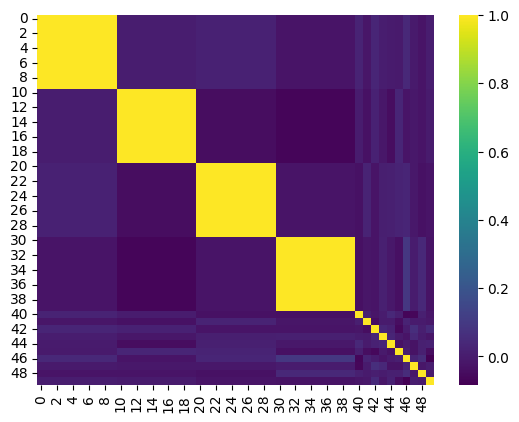

In [8]:
print(f'X shape = {X.shape}', f'0 = {int(len(y) - y.sum(axis=0)[0])}', f'1 = {int(y.sum(axis=0)[0])}')
sns.heatmap(X.corr(), cmap="viridis")
plt.savefig('img/4_corr.jpg')

### Reduce num of features by hands

X shape = (1000, 14)


/home/kreinin.mv/.pyenv/versions/3.11.3/envs/venv-main/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


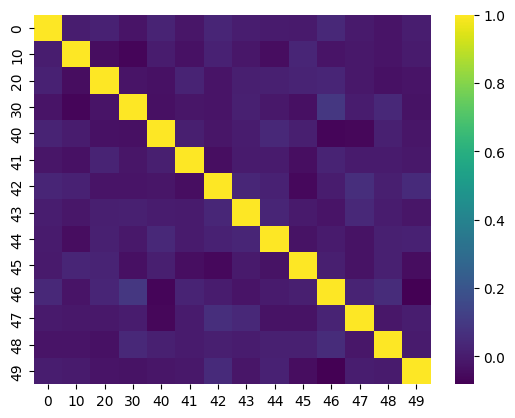

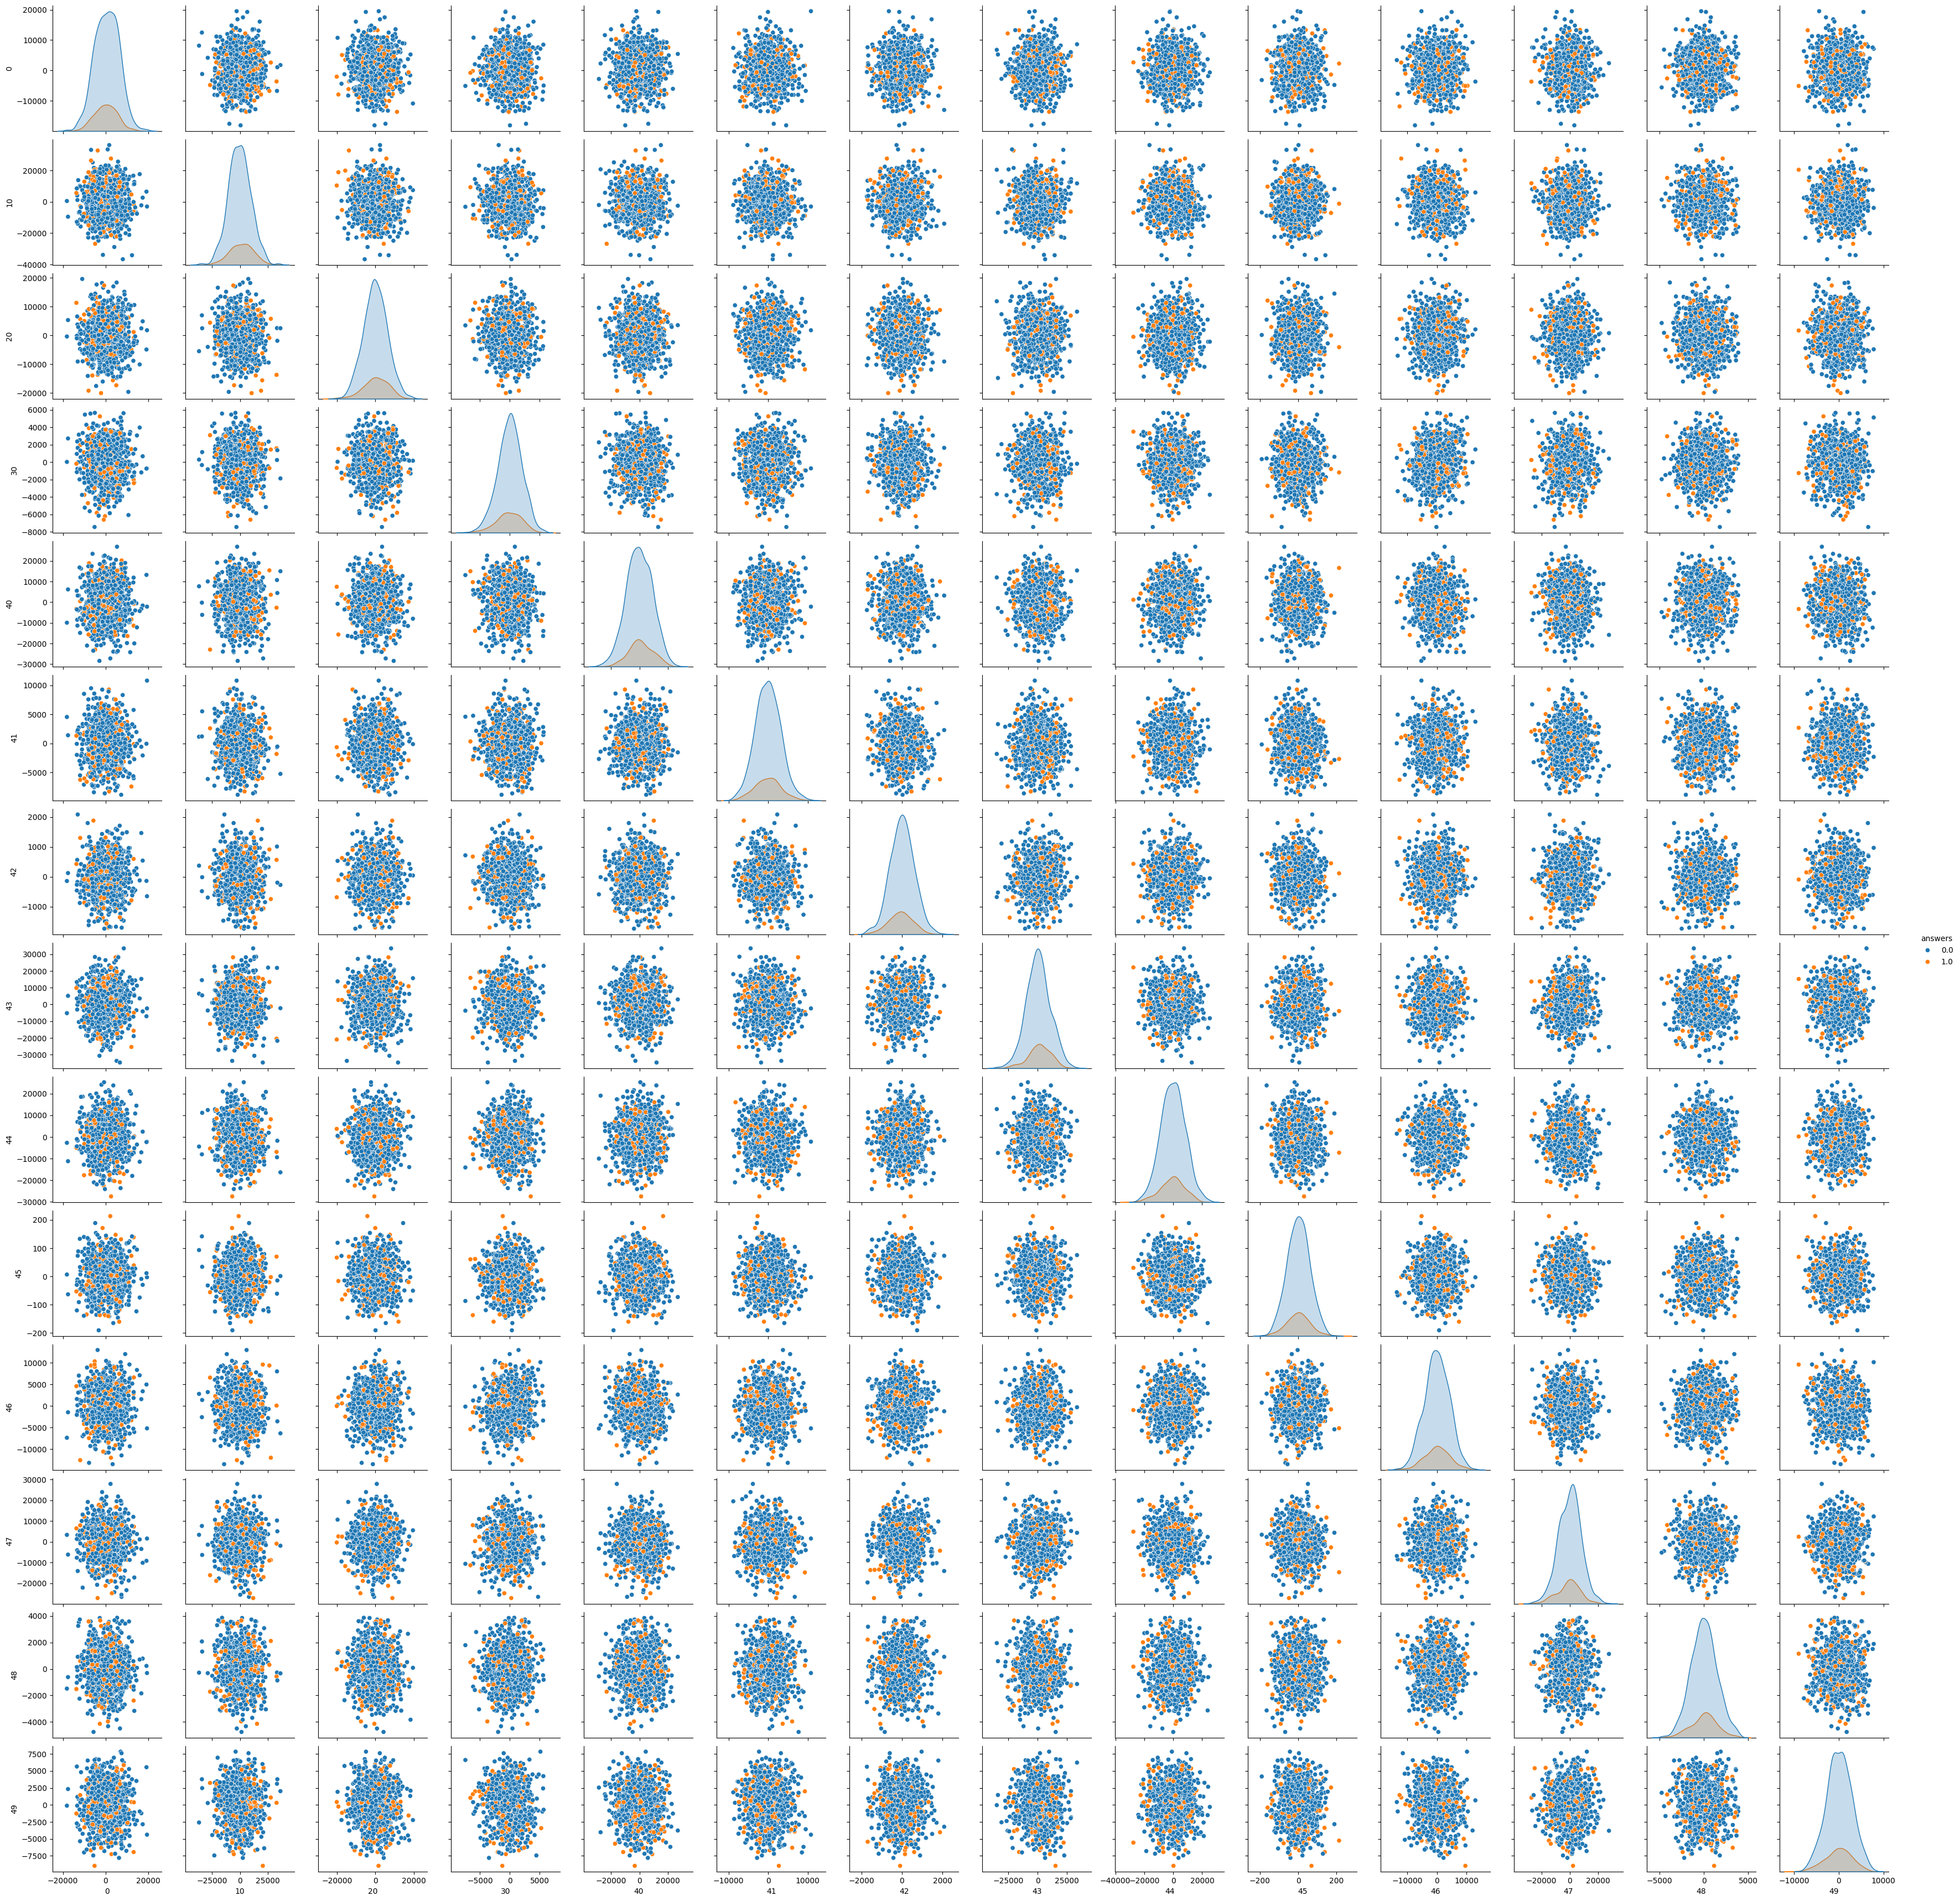

In [9]:
columns = [1, 2, 3, 4, 5, 6, 7, 8, 9,
           11, 12, 13, 14, 15, 16, 17, 18, 19,
           21, 22, 23, 24, 25, 26, 27, 28, 29,
           31, 32, 33, 34, 35, 36, 37, 38, 39,
           ]
           
df = X.drop(columns=columns) 
print(f'X shape = {df.shape}')
sns.heatmap(df.corr(), cmap="viridis")
data = df.copy()
data['answers'] = y
sns.pairplot(data=data, hue='answers')

Exaplained ratio =  [2.52062932e-01 2.06412682e-01 1.85452549e-01 1.70010904e-01
 5.41792381e-02 4.28103153e-02 3.63131157e-02 3.31524748e-02
 8.91856215e-03 5.26380506e-03 4.12765039e-03 1.10916525e-03
 1.84805060e-04 1.80107153e-06]
Singular values =  [694591.88102328 628555.16379569 595787.81196403 570444.7648707
 322026.53384782 286252.58948112 263637.36823143 251902.91162177
 130653.97652187 100374.89618205  88884.62892931  46075.84810461
  18807.54630151   1856.69552939]


<Axes: >

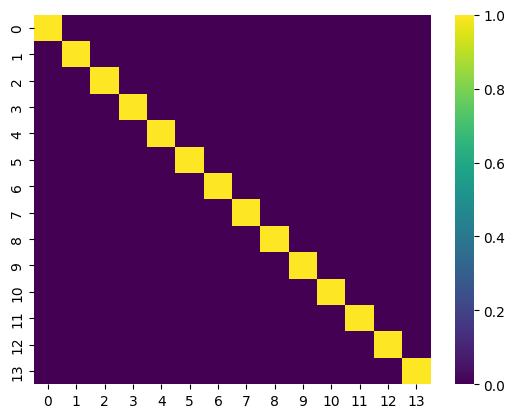

In [171]:
model_pca = PCA(n_components=14)
X_new = model_pca.fit_transform(X)
df = pd.DataFrame(X_new)
print('Exaplained ratio = ', model_pca.explained_variance_ratio_)
print('Singular values = ', model_pca.singular_values_)
sns.heatmap(df.corr(), cmap="viridis")

### BaseLine

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df.to_numpy(), y.to_numpy(),
                                                    test_size=0.9, 
                                                    stratify=y.to_numpy()[:, 0], 
                                                    random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [181]:
model = LogisticRegression()
model.fit(X_train, y_train[:, 0])
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
print(y_prob[:, 0].shape)
auc, num, asy, asy2 = get_metrics(y_pred, y_test[:, 0], y_prob[:, 1])
print(auc, num, asy, asy2)
#y_pred = np.random.binomial(1, np.sum(y_train)/len(y_train), len(y_test))
y_pred = np.zeros_like(y_test[:, 0])
y_prob = np.ones_like(y_test[:, 0])
auc, num, asy, asy2 = get_metrics(y_pred, y_test[:, 0], y_prob)
print(auc, num, asy, asy2)

(900,)
0.48655836687751575 196 568 -252
0.5 148 148 -456


### Investigate statistics
Смотрим на коэффециент Шапиро и параметры нормального распределение

<Axes: >

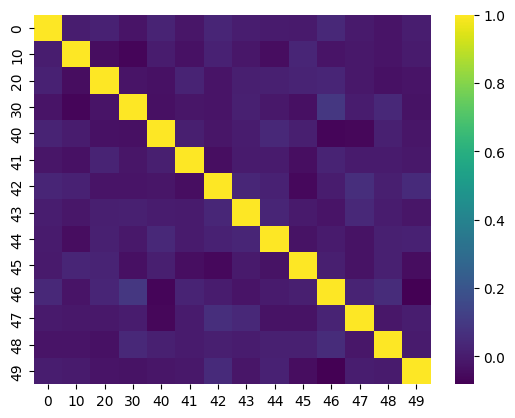

In [78]:

sns.heatmap(df.corr(), cmap="viridis")

In [4]:
columns = [1, 2, 3, 4, 5, 6, 7, 8, 9,
           11, 12, 13, 14, 15, 16, 17, 18, 19,
           21, 22, 23, 24, 25, 26, 27, 28, 29,
           31, 32, 33, 34, 35, 36, 37, 38, 39,
           ]
df = X.drop(columns=columns)
X_test = X_test.drop(columns=columns)

In [6]:
from scipy.stats import shapiro
from scipy.stats import norm
def print_shapiro(df):
    for col in df.columns:
        x = df[col].values
        shapiro_p = shapiro(x)[0]
        mu, std = norm.fit(x)
        print(f"P_val: {round(shapiro_p, 3)}, N({round(mu, 2)}, {round(std, 2)})")

def print_KLdiv(df, y):
    kulback = []
    mask0 = ((y==0).values)[:, 0]
    mask1 = ((y==1).values)[:, 0]
    for col in df.columns:
        x0 = df[col][mask0].values
        x1 = df[col][mask1].values
        shapiro_p0 = shapiro(x0)[0]
        shapiro_p1 = shapiro(x1)[0]
        mu0, std0 = norm.fit(x0)
        mu1, std1 = norm.fit(x1)
        kl = np.log(std1/std0) + (std0**2 + (mu0 - mu1)**2)/(2 * std1**2) - 0.5
        print(f"KL_div: {round(kl, 3)}, Shapiro_ps: ({round(shapiro_p0, 3)}, {round(shapiro_p1, 3)}), N({round(mu0, 3)}, {round(std0, 3)}), N({round(mu1, 3)}, {round(std1, 3)})")
        kulback.append(kl)
    return kulback

### Choose features by Kullback–Leibler distance

In [7]:
print("Kullback–Leibler divergence after features extraction")
KL = print_KLdiv(df, y)

Kullback–Leibler divergence after features extraction
KL_div: 0.016, Shapiro_ps: (0.998, 0.996), N(640.642, 5709.68), N(137.699, 5161.248)
KL_div: 0.018, Shapiro_ps: (0.997, 0.997), N(-399.438, 10085.669), N(1484.969, 10581.339)
KL_div: 0.004, Shapiro_ps: (0.999, 0.986), N(34.801, 6171.566), N(245.685, 6545.347)
KL_div: 0.007, Shapiro_ps: (0.997, 0.987), N(-27.236, 2019.776), N(-213.278, 2136.546)
KL_div: 0.016, Shapiro_ps: (0.998, 0.993), N(-182.761, 9046.074), N(923.073, 8341.282)
KL_div: 0.0, Shapiro_ps: (0.998, 0.996), N(-75.711, 3170.791), N(-123.006, 3230.238)
KL_div: 0.008, Shapiro_ps: (0.998, 0.997), N(6.685, 596.844), N(-66.717, 602.204)
KL_div: 0.011, Shapiro_ps: (0.998, 0.987), N(488.175, 10258.693), N(1596.607, 9619.119)
KL_div: 0.004, Shapiro_ps: (0.999, 0.985), N(-163.775, 8387.734), N(-938.142, 8413.072)
KL_div: 0.005, Shapiro_ps: (0.999, 0.992), N(0.513, 58.319), N(0.17, 62.699)
KL_div: 0.001, Shapiro_ps: (0.999, 0.993), N(-88.883, 4135.174), N(19.941, 4250.186)
KL_div:

In [7]:
np.sort(np.array(KL))[::-1]

array([0.01808748, 0.01573805, 0.01566837, 0.01096679, 0.00830783,
       0.00750789, 0.00683489, 0.00501508, 0.00488477, 0.00424506,
       0.00384503, 0.00106682, 0.00044798, 0.00017414])

In [8]:
top_kulback = df.columns[np.argsort(np.array(KL))][::-1]

### Train and choose best model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.svm import SVC
from tqdm import tqdm
kernels = ['rbf', 'sigmoid', 'precomputed']
for i in range(1, len(top_kulback)):
    for ker in tqdm(kernels):
        svm = SVC(kernel=ker, probability=True)
        grid_search = GridSearchCV(svm, {'C': np.linspace(0.001, 1000, 20)}, scoring='roc_auc', refit=True, cv=10)
        grid_search.fit(df[top_kulback[:i]].values, y.values[:, 0])
        print(f'kernel = {ker}, i = {i} | Best parameter C ={grid_search.best_params_["C"]} Best log_evidence = {grid_search.best_score_}')
        #svm = grid_search.best_estimator_

In [42]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [191]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
res = []
for i in range(1, len(top_kulback)+1):
    res_i = np.mean(cross_val_score(nb, df[top_kulback[:i]].values, y.values[:, 0], scoring='roc_auc', cv=10))
    res.append(res_i)

best_k = np.argmax(res)+1
print(best_k)

4


In [18]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', tol=1e-3, max_iter=2000)
for i in range(1, len(top_kulback)+1):
    print(np.mean(cross_val_score(lr, df[top_kulback[:i]].values, y.values[:, 0], scoring='roc_auc', cv=10)))

0.5554448887988931
0.5535791274341062
0.5515986741081975
0.5566199672640141
0.5541617098646687
0.5547419720900408
0.5538239618136411
0.5415858286085518
0.5384753826229287
0.5360268806317707
0.5334617883297897
0.5274244034963382
0.5227651678141136
0.5118943737133408


In [194]:
for i in range(1, len(top_kulback)+1):
    print(np.mean(cross_val_score(nb, df[top_kulback[:i]].values, y.values[:, 0], scoring='roc_auc', cv=10)))

0.549028414076474
0.5539596938172859
0.5587357307380783
0.5669246312983025
0.5487760917620059
0.5435274184975194
0.551509715331916
0.5452380952380953
0.5413019198643312
0.5337232332692112
0.5338545885221558
0.5250355413249637
0.514756452279707
0.5015435692349228


### Cringe moment

In [139]:
np.sum(y.values)

164.0

In [86]:
#top_kulback[0]
alpha = 0.1
thress = (df[10].quantile(0.5*alpha), df[10].quantile(1-0.5*alpha))
thress

(-16859.773923010976, 16717.591558246466)

In [40]:
def remove_points(X, X_test):
    
    for col in X.columns:
        mu, std = norm.fit(X[col])
        mask = X[col][

0

In [45]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
best = 0.
for iter in range(1, 100):

    model = CatBoostClassifier(iterations=12,
                               task_type="CPU",
                               verbose=False,
                               eval_metric='AUC')

    result = cross_val_score(model, df[top_kulback[:4]].values, y.values[:, 0], scoring='roc_auc', cv=10)
    if np.mean(result) > best:
        best = np.mean(result)
        print(iter,  np.mean(result))
#print(f'{i}:', np.mean(result))

1 0.5026144757601836
2 0.5536336258901151
3 0.5560059565995072
6 0.5633369085586042
8 0.5654534893776788
9 0.5682033543839223
10 0.5764411901808917
11 0.5830180227211367
12 0.5849063006226587


In [74]:
X.describe()

0             1            2             3            4   \
count   1000.000000   1000.000000  1000.000000   1000.000000  1000.000000   
mean     558.159597    652.090135    94.325948    441.985035   154.652286   
std     5629.302755   6576.611200   951.318287   4457.645319  1559.738229   
min   -18101.550648 -21147.813624 -3059.048398 -14334.010746 -5015.488961   
25%    -3439.363183  -4018.152198  -581.230957  -2723.524811  -952.941294   
50%      691.050637    807.346072   116.790737    547.253611   191.481815   
75%     4662.588621   5447.232468   787.953281   3692.139639  1291.875481   
max    19513.802875  22797.654274  3297.708295  15452.325463  5406.802710   

                 5             6             7            8             9   \
count   1000.000000   1000.000000   1000.000000  1000.000000   1000.000000   
mean     710.015431    906.429781    789.125703   238.572375    492.849142   
std     7160.856161   9141.806583   7958.737054  2406.113160   4970.614726   
min   -23026.362030 -29396.189695 -25591.981889 -7737.093735 -15983.490867   
25%    -4375.036968  -5585.437161  -4862.616909 -1470.044189  -3036.937816   
50%      879.001045   1122.341432    977.042514   295.382162    610.231499   
75%     5931.156179   7571.940317   6592.028993  1992.935556   4116.996932   
max    24822.904525  31689.778201  27588.804522  8340.690063  17230.404406   

       ...            40            41           42            43  \
count  ...   1000.000000   1000.000000  1000.000000   1000.000000   
mean   ...     -1.404105    -83.467094    -5.352897    669.958340   
std    ...   8948.153613   3182.256050   598.643339  10169.939674   
min    ... -28472.112849  -8808.233782 -1734.890021 -34732.346891   
25%    ...  -6016.281240  -2230.920166  -393.507489  -6023.211505   
50%    ...     30.498693    -54.814079    -2.772839    819.172917   
75%    ...   6512.839855   2044.792060   373.695810   7137.982049   
max    ...  26846.523145  10801.876060  2088.060246  33489.182623   

                 44           45            46            47           48  \
count   1000.000000  1000.000000   1000.000000   1000.000000  1000.000000   
mean    -290.771308     0.456753    -71.035947   -147.367665     1.623183   
std     8400.993423    59.089510   4156.528271   8084.699505  1463.079039   
min   -27538.197538  -190.830813 -13510.886657 -27115.788771 -4753.310004   
25%    -5749.134452   -39.790305  -2725.646806  -5507.220392  -957.853081   
50%     -183.531961     1.155087     31.830069    262.370229    19.831944   
75%     5298.515513    39.877248   2829.779151   5138.244847   916.984724   
max    25302.580824   213.215541  12944.532260  27882.609345  3864.330812   

                49  
count  1000.000000  
mean     54.592681  
std    2834.753361  
min   -8963.654414  
25%   -1772.911999  
50%     101.747645  
75%    2008.088768  
max    7835.286277  

[8 rows x 50 columns]

In [75]:
np.mean(result)

0.5580100338328102

In [165]:
skf = StratifiedKFold(n_splits=4)

In [130]:
import matplotlib.pyplot as plt
from tqdm import tqdm
def threshold_func(X, y, model, n_splits=4):
    skf = StratifiedKFold(n_splits=n_splits)
    y_proba_pred = cross_val_predict(model, X, y, cv=skf, method='predict_proba')[:,1] # for class '1'
    thresholds = np.linspace(0, 1, 501)
    fig, axs = plt.subplots(ncols=3, figsize=(16, 4))
    nums, acy1s, acy2s = [], [], []
    for thres in tqdm(thresholds):
        y_pred = np.array([int(x>thres) for x in y_proba_pred])
        conf_mat = confusion_matrix(y, y_pred)

        num = np.sum([y_pred!=y])
        nums.append(num)
        
        acy1 = np.sum(np.array([[-9, 9], [1, 0]]) * conf_mat)
        acy1s.append(acy1)

        acy2 = np.sum(np.array([[-1, 3], [2, -1]]) * conf_mat)
        acy2s.append(acy2)
    
    loc_min = np.argmin(nums)
    if len(np.unique(acy1s[loc_min:])) == 1:
        loc_min = len(acy1s) - 1
    num_thres = thresholds[loc_min]
    axs[0].set_title('NUM = %d'% nums[loc_min])
    axs[0].plot(thresholds, nums, c='C0', lw=1.5)#, label='NUM, best_thres=%.2f'%num_thres)
    axs[0].scatter(thresholds[loc_min], nums[loc_min], c='C0', s=25)
    axs[0].set_xlabel('Threshold')
    axs[0].set_ylabel('NUM')
    axs[0].legend();
    
    loc_min = np.argmin(acy1s)
    if len(np.unique(acy1s[loc_min:])) == 1:
        loc_min = len(acy1s) - 1
    acy1_thres = thresholds[loc_min]
    axs[1].set_title('ASY1 = %d'% acy1s[loc_min])
    axs[1].plot(thresholds, acy1s, c='C1', lw=1.5)#, label='AY1, best_thres=%.2f'%acy1_thres)
    axs[1].scatter(thresholds[loc_min], acy1s[loc_min], c='C1', s=25)
    axs[1].set_xlabel('Threshold')
    axs[1].set_ylabel('ASY1')
    axs[1].legend();
    
    loc_min = np.argmin(acy2s)
    if len(np.unique(acy1s[loc_min:])) == 1:
        loc_min = len(acy2s) - 1
    acy2_thres = thresholds[loc_min]
    axs[2].set_title('ASY2 = %d'% acy2s[loc_min])
    axs[2].plot(thresholds, acy2s, c='C2', lw=1.5)#, label='ACY2, best_thres=%.2f'%acy2_thres)
    axs[2].scatter(thresholds[loc_min], acy2s[loc_min], c='C2', s=25)
    axs[2].set_xlabel('Threshold')
    axs[2].set_ylabel('ASY2')
    axs[2].legend();
    
    plt.savefig('img/14_thres.jpg')
    
    return num_thres, acy1_thres, acy2_thres

100%|██████████| 501/501 [00:00<00:00, 762.28it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


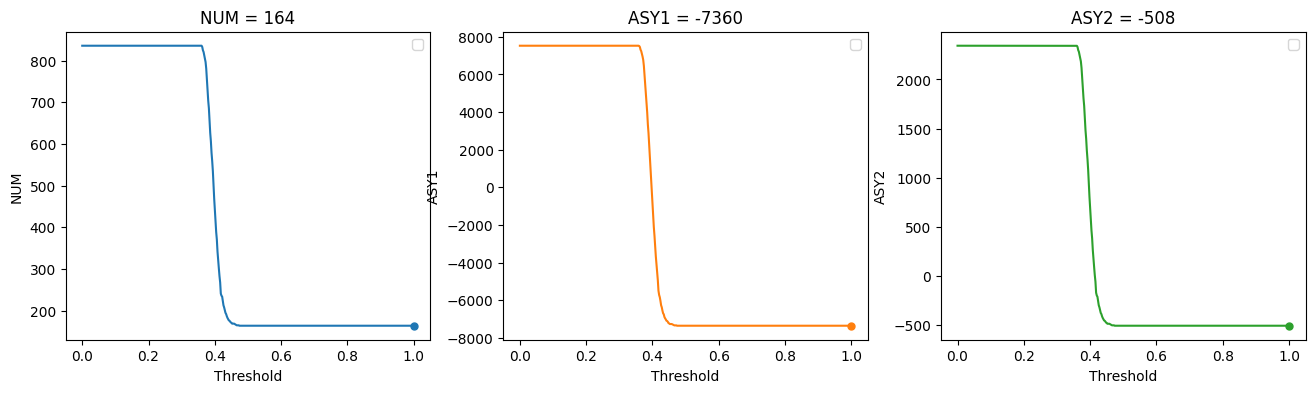

In [132]:
model = CatBoostClassifier(iterations=12,
                           task_type="CPU",
                           verbose=False,
                           eval_metric='AUC', l2_leaf_reg =0.001, depth=9)
num_thres, acy1_thres, acy2_thres = threshold_func(df[top_kulback[:4]].values, y.values[:, 0], model)

In [11]:
from sklearn.metrics import roc_auc_score
def get_metrics(y_pred, y_targ, y_prob):
    auc = roc_auc_score(y_targ, y_prob)
    num = get_num(y_pred, y_targ)
    asy1 = get_ASY(y_pred, y_targ, p=[-9, 9, 1, 0])
    asy2 = get_ASY(y_pred, y_targ, p=[-1, 3, 2, -1])
    return auc, num, asy1, asy2
def get_num(y_pred, y_targ):
    return np.sum(y_pred != y_targ)
def get_ASY(y_pred, y_targ, p=[-1, 1, 1, -1]):
    TP = np.sum((y_pred == 1) & (y_targ == 1))
    FP = np.sum((y_pred == 1) & (y_targ == 0))
    FN = np.sum((y_pred == 0) & (y_targ == 1))
    TN = np.sum((y_pred == 0) & (y_targ == 0))
    return p[0]*TP + p[1]*FP + p[2]*FN + p[3]*TN

In [12]:
model = CatBoostClassifier(iterations=12,
                           task_type="CPU",
                           verbose=False,
                           eval_metric='AUC', l2_leaf_reg =0.001, depth=9)
model.fit(df[top_kulback[:4]].values, y.values[:, 0])

In [114]:
X_test.shape
#df.shape

(1000, 14)

In [13]:
y_pred = model.predict_proba(X_test[top_kulback[:4]])[:, 1]

In [141]:
print("NUM:", get_num(np.zeros_like(y.values), y.values))
y_targ = y.values[:, 0]
y_pred = np.zeros_like(y_targ)
asy1 = get_ASY(y_pred, y_targ, p=[-9, 9, 1, 0])
asy2 = get_ASY(y_pred, y_targ, p=[-1, 3, 2, -1])
print("ASY1:", asy1)
print("ASY2:", asy2)

NUM: 164
ASY1: 164
ASY2: -508


### Final model

In [19]:
def get_test(num=1, to_numpy=False):
    X = pd.read_csv(f'./data/task1_{num}_test_X.csv', header=None, sep=' ')
    if to_numpy:
        return X.to_numpy()
    return X
    
X_test = get_test(4)

In [20]:
model = GaussianNB()
model.fit(df[top_kulback[:best_k]].values, y.values[:, 0])

NameError: name 'GaussianNB' is not defined

In [14]:
#y_prob = model.predict_proba(X_test[top_kulback[:best_k]].values)#, y.values[:, 0]
y_prob = model.predict_proba(X_test[top_kulback[:4]])
#y_prob[:, 1].shape
answer = pd.DataFrame(columns=['AUC', 'NUM', 'ASY1', 'ASY2'])
answer['AUC'] = y_prob[:, 1]
answer['NUM'] = np.zeros_like(y_prob[:, 1], dtype=int)
answer['ASY1'] = np.zeros_like(y_prob[:, 1], dtype=int)
answer['ASY2'] = np.zeros_like(y_prob[:, 1], dtype=int)

In [15]:
answer.to_csv('./answers/task1_4_ans.csv', index=False)